In [2]:
from read_simulation_data.get_foreground_variable import get_foreground_variable
from read_simulation_data.get_background_variable import get_background_variable
from read_simulation_data.get_num_snaps import get_num_snaps
from read_simulation_data.get_info import get_info
from read_simulation_data.get_mpi_info import get_mpi_info
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
import numpy as np
import os
import visualize_background as vb
import astropy.units as u

from plot_simulation_data.plot_foreground_variable_2D import plot_foreground_variable_2D
from plot_simulation_data.plot_foreground_variable_1D import plot_foreground_variable_1D
from plot_simulation_data.plot_all_foreground_variables_2D import plot_all_foreground_variables_2D
from plot_simulation_data.plot_all_foreground_variables_1D import plot_all_foreground_variables_1D
from plot_simulation_data.animate_all_foreground_variables_1D import animate_all_foreground_variables_1D
from plot_simulation_data.animate_all_foreground_variables_2D import animate_all_foreground_variables_2D
from plot_simulation_data.plot_foreground_variable_cross_section_3D import plot_foreground_variable_cross_section_3D
from plot_simulation_data.plot_all_foreground_variables_cross_section_3D import plot_all_foreground_variables_cross_section_3D
from plot_simulation_data.animate_all_foreground_variables_across_axis_3D import animate_all_foreground_variables_across_axis_3D

from plot_simulation_data.plot_conservation_of_mass_2D import plot_conservation_of_mass_2D

DATA_FOLDER = "/mn/stornext/d10/data/tabjone/data/"
R_SUN = 6.957e10

/usr/lib64/python3.9/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [ ]:
SAVE_FOLDER = 'data/'
RUN_NAME = "thesis_rising_bubble_conv_stable/"
#RUN_NAME = "fix_vx_big_periodic_func_2/"
SAVE_NAME = SAVE_FOLDER+RUN_NAME+"foreground.mp4"

if not os.path.exists(SAVE_FOLDER+RUN_NAME):
    os.makedirs(SAVE_FOLDER+RUN_NAME)

constants_dict, global_params_dict, grid_info_dict = get_info(DATA_FOLDER+RUN_NAME)
global_params_dict

#vb.plot_background(DATA_FOLDER, RUN_NAME, SAVE_FOLDER+RUN_NAME+"background.png")
"""
for i in [0, 1, 30, 65, 99, 134]:

    plot_all_foreground_variables_2D(DATA_FOLDER+RUN_NAME, plt.figure(figsize=(12,16)),i, **{'normalize':False, 'quiver_on':False, 't_scale':u.h, 'norm':'pow', 'gamma':2, "thesis":1})
    plt.savefig("plots_for_thesis/bubbles/rising_bubble_{}.png".format(i))
    plt.clf()
for i in [0, 1, 30, 66, 99, 134, 170, 205]:
    RUN_NAME = "thesis_sinking_bubble_conv_stable/"
    plot_all_foreground_variables_2D(DATA_FOLDER+RUN_NAME, plt.figure(figsize=(12,16)),i, **{'normalize':False, 'quiver_on':False, 't_scale':u.h, 'norm':'pow', 'gamma':2, "thesis":1})
    plt.savefig("plots_for_thesis/bubbles/sinking_bubble_{}.png".format(i))
    plt.clf()
#plt.savefig("plots_for_thesis/bubbles/rising_bubble_134.png")
#animate_all_foreground_variables_2D(DATA_FOLDER+RUN_NAME, save=True, save_name=SAVE_NAME, fps=5, save_interval=1, **{'normalize':False, 'quiver_on':True, 't_scale':u.day, 'norm':'powe','gamma':2})
"""

In [ ]:
0.3/(0.69-0.689)

In [ ]:
def get_total_momentum(RUN_NAME, snap_nr):

    rho0, unit = get_background_variable(DATA_FOLDER+RUN_NAME, "rho0")
    rho0 = rho0 * u.Unit(unit)
    r, unit = get_background_variable(DATA_FOLDER+RUN_NAME, "r")
    r = r * u.Unit(unit)
    rho1, unit, t = get_foreground_variable(DATA_FOLDER+RUN_NAME, snap_nr, "rho1")
    rho1 = rho1 * u.Unit(unit)
    vy, unit, _ = get_foreground_variable(DATA_FOLDER+RUN_NAME, snap_nr, "vy")
    vy = vy * u.Unit(unit)
    vz, unit, _ = get_foreground_variable(DATA_FOLDER+RUN_NAME, snap_nr, "vz")
    vz = vz * u.Unit(unit)

    t = t * u.s
    rho = rho0[:,np.newaxis] + rho1
    momentum_y = rho*vy
    momentum_z = rho*vz

    total_momentum = np.sqrt(momentum_y**2 + momentum_z**2)

    return total_momentum, r, t

In [ ]:
#RUN_NAME = "thesis_conv_off/"
RUN_NAME = "thesis_conv_on_1e-4/"

plt.title(r"$<\rho || \mathbf{v} ||_2>_x$")
total_momentum, r, t = get_total_momentum(RUN_NAME, 100)
plt.plot(np.mean(total_momentum, axis=1), r/R_SUN, label="t={:.1f}h".format(t.to(u.h).value))
total_momentum, r, t = get_total_momentum(RUN_NAME, 300)
plt.plot(np.mean(total_momentum, axis=1),r/R_SUN, label="t={:.1f}h".format(t.to(u.h).value))
total_momentum, r, t = get_total_momentum(RUN_NAME, 600)
plt.plot(np.mean(total_momentum, axis=1), r/R_SUN, label="t={:.1f}h".format(t.to(u.h).value))
total_momentum, r, t = get_total_momentum(RUN_NAME, 900)
plt.plot(np.mean(total_momentum, axis=1), r/R_SUN, label="t={:.1f}h".format(t.to(u.h).value))

plt.ylabel(r"$r/R_{\odot}$", fontsize=12)
plt.xlabel(r"Mean momentum [{}]".format(total_momentum.unit))
plt.legend()

In [ ]:
plt.plot()
RUN_NAME = "rk3_first_new_fix_3/"


In [ ]:
RUN_NAME = "test_on_off_velocity_cut_rk1/"

r, _ = get_background_variable(DATA_FOLDER+RUN_NAME, "r")
rho0, _ = get_background_variable(DATA_FOLDER+RUN_NAME, "rho0")

plt.title(r"$<u_x(\rho_0+\rho_1)>_x$")

print(np.mean(vy*(rho1+rho0[:,np.newaxis]), axis=1))

for snap in [10*i for i in range(1,9)]:
    vy, _, t = get_foreground_variable(DATA_FOLDER+RUN_NAME, snap, "vy")
    rho1, _, _ = get_foreground_variable(DATA_FOLDER+RUN_NAME, snap, "rho1")
    t = t * u.s
    t = t.to(u.h)
    plt.plot(np.mean(vy*(rho1+rho0[:,np.newaxis]), axis=1), r/R_SUN, label="t={:.2f}h".format(t.value))

_, vy_unit, _ = get_foreground_variable(DATA_FOLDER+RUN_NAME, 0, "vy")
_, rho_unit, _ = get_foreground_variable(DATA_FOLDER+RUN_NAME, 0, "rho1")
vy_unit = u.Unit(vy_unit)
rho_unit = u.Unit(rho_unit)

plt.xlabel("Mean momentum [{}]".format(vy_unit*rho_unit))
plt.ylabel(r"$r/R_{\odot}$")
plt.legend()
plt.grid(True)

In [ ]:
#RUN_NAME = "rk3_first_new_fix_3/"
RUN_NAME = "test_on_off_velocity_cut_rk1/"

r, _ = get_background_variable(DATA_FOLDER+RUN_NAME, "r")
rho0, _ = get_background_variable(DATA_FOLDER+RUN_NAME, "rho0")

plt.title(r"$<u_x>_x$")
for snap in [i for i in range(0,92)]:
    vy, _, t = get_foreground_variable(DATA_FOLDER+RUN_NAME, snap, "vy")
    rho1, _, _ = get_foreground_variable(DATA_FOLDER+RUN_NAME, snap, "rho1")
    t = t * u.s
    t = t/1000
    plt.plot(np.mean(vy, axis=1), r/R_SUN, label="t={:.2f}ks".format(t.value))

_, vy_unit, _ = get_foreground_variable(DATA_FOLDER+RUN_NAME, 50, "vy")
_, rho_unit, _ = get_foreground_variable(DATA_FOLDER+RUN_NAME, 50, "rho1")
vy_unit = u.Unit(vy_unit)
rho_unit = u.Unit(rho_unit)

plt.xlabel("Mean velocity [{}]".format(vy_unit))
plt.ylabel(r"$r/R_{\odot}$")
plt.legend()
plt.grid(True)

In [ ]:
# lower pressure boundary er negativ, top er positiv
# lower entropy boundary er positiv, top er negativ
# eos: p1/p0 - s1/cp

In [ ]:
RUN_NAME = "periodic_wave_2/"

def total_mass(snap_nr):

    rho1, _, t = get_foreground_variable(DATA_FOLDER + RUN_NAME, snap_nr, "rho1")
    physical_constants, global_parameters, grid_info = get_info(DATA_FOLDER + RUN_NAME)
    dy = grid_info['dy'][0]
    dz = grid_info['dz'][0]
    nz_full = grid_info['nz_full'][0]
    nz_ghost = grid_info['nz_ghost'][0]
    rho1 = rho1[nz_ghost:nz_full-nz_ghost]

    #finding total mass by integration
    total_mass = np.sum(rho1)*dy*dz
    return total_mass, t


t = []
mass = []

num_snaps = get_num_snaps(DATA_FOLDER + RUN_NAME)

for i in range(0, num_snaps, 100):

    m, time = total_mass(i)
    t.append(time)
    mass.append(m)

t = (np.array(t) * u.s)
mass = np.array(mass)*u.g

t = t.to(u.day)

mask = np.where(t.value > 40)
t = t[mask]
mass = mass[mask]

In [ ]:
t = t.to(u.day)
plt.plot(t, mass, color="Black")
plt.xlabel("Time [{0}]".format(t.unit))
plt.ylabel("Total mass [g]")
#plt.savefig("plots_for_thesis/total_mass.png")

In [ ]:
print(f"{c_p:.2e}")

In [ ]:
s1, _, _ = get_foreground_variable(DATA_FOLDER + RUN_NAME, 0, "s1")
np.max(s1)/c_p

In [ ]:
RUN_NAME = "rk3_first_new_fix_3/"

get_num_snaps(DATA_FOLDER + RUN_NAME)

In [ ]:
RUN_NAME = "rk3_first_new_fix_3/"

snap = 305

p0, _ = get_background_variable(DATA_FOLDER + RUN_NAME, "p0")
rho0, _ = get_background_variable(DATA_FOLDER + RUN_NAME, "rho0")
p1, _, _ = get_foreground_variable(DATA_FOLDER + RUN_NAME, snap, "p1")
s1, _, _ = get_foreground_variable(DATA_FOLDER + RUN_NAME, snap, "s1")
rho1, _, _ = get_foreground_variable(DATA_FOLDER + RUN_NAME, snap, "rho1")

physical_constants, global_parameters, grid_info = get_info(DATA_FOLDER + RUN_NAME)

K_B = physical_constants['K_B'][0]
MU = physical_constants['MU'][0]
M_U = physical_constants['M_U'][0]
GAMMA = global_parameters['GAMMA'][0]
c_p = K_B / (MU * M_U) /(1.0-1.0/GAMMA)

p1b = p1[2,0]
p1t = p1[-3,0]

p0b = p0[2]
p0t = p0[-3]

rho0b = rho0[2]
rho0t = rho0[-3]

s1b = s1[2,0]
s1t = s1[-3,0]
#s1t = -5.0e-4 * c_p

rho1t = rho1[-3,0]
rho1b = rho1[2,0]

rho1t = rho0t * (-s1t/c_p + 1/GAMMA * p1t/p0t)
rho1b = rho0b * (-s1b/c_p + 1/GAMMA * p1b/p0b)

s1b/c_p

In [ ]:
print(f"{s1b/c_p:.2e}, {s1t/c_p:.2e}, {p1b:.2e}, {p1t:.2e}")

In [ ]:
print(f"{s1b/c_p:.2e}, {s1t/c_p:.2e}, {p1b:.2e}, {p1t:.2e}")

In [ ]:
p1b = 0.01 * p0[2]
rho1b = rho0b * 1/GAMMA * p1b/p0b

p1t = -p0t * (rho0b/rho0t *p1b/p0b)



In [ ]:
s1.shape

In [ ]:
print(f"{c_p:.1e}")

In [ ]:
# really good convective patterns
# RUN_NAME = "test_p1_boundary_high_res_3/"

In [ ]:
fix_vx_big_rk3_no_lax - sjekk krasj

In [ ]:
procs = get_mpi_info(DATA_FOLDER + RUN_NAME+'mpi_info.h5')
s1, _, _ = get_foreground_variable(DATA_FOLDER + RUN_NAME, 1, "s1")
s1.shape, procs

In [ ]:
den beste: rk3_first_new_fix
low lax, high res. Fortsatt bra men stoppet av en grunn

rk3_first_new_fix_5 er og bra, men der fjerner jeg litt <vy>_z

In [ ]:
def mean_velocity():
    num_snaps = get_num_snaps(DATA_FOLDER + RUN_NAME)

    mean_vel = []
    t = []
    for i in range(0, num_snaps, 100):
        vy, _, time = get_foreground_variable(DATA_FOLDER + RUN_NAME, i, "vy")
        vz, _, _ = get_foreground_variable(DATA_FOLDER + RUN_NAME, i, "vz")
        vel = np.sqrt(vy**2 + vz**2)
        mean_vel.append(np.mean(vel))
        t.append(time)
    return t, mean_vel

In [ ]:
2e6/1000/10

In [ ]:
2112839/1e3

In [17]:
s1, _, _ = get_foreground_variable(DATA_FOLDER + RUN_NAME, 0, "s1")
len(np.where(s1 < 0))

2

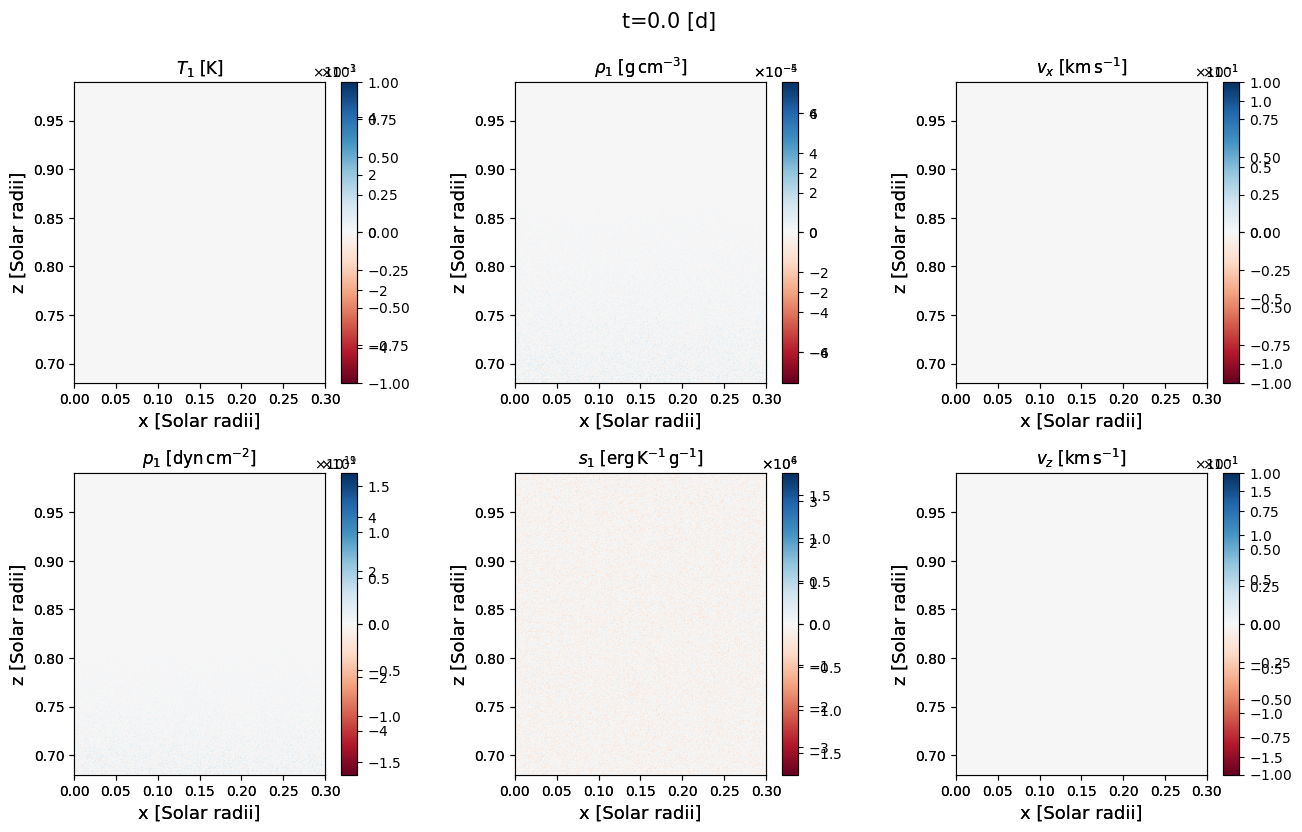

In [23]:
SAVE_FOLDER = 'data/'
RUN_NAME = "test_old_ic_4/" #hyades18
#RUN_NAME = "remove_vz_ic_4/" #hyades21
SAVE_NAME = SAVE_FOLDER+RUN_NAME+"foreground.mp4"

if not os.path.exists(SAVE_FOLDER+RUN_NAME):
    os.makedirs(SAVE_FOLDER+RUN_NAME)

#vb.plot_background(DATA_FOLDER, RUN_NAME, SAVE_FOLDER+RUN_NAME+"background.png")

#plot_all_foreground_variables_2D(DATA_FOLDER+RUN_NAME, plt.figure(figsize=(16,9)),700, **{'normalize':True, 'quiver_on':False, 't_scale':u.day, 'norm':'powe', 'gamma':1.5, 'plo_range':[0.68, 0.70, 0, 0.3], 'thess':False})

animate_all_foreground_variables_2D(DATA_FOLDER+RUN_NAME, save=True, save_name=SAVE_NAME, fps=15, save_interval=5, **{'normalize':False, 'quiver_on':False, 't_scale':u.day, 'snap_rangee':range(0, 701)})

In [ ]:
450000/60/60

In [ ]:
# Define the units
unit = u.erg / u.K / u.g

# Format the unit as a LaTeX string
latex_string = unit.to_string(format='latex_inline')
print(latex_string)

In [ ]:
import numpy as np
from numpy.fft import fft, fftfreq

# Assuming `vz_grid` and `vx_grid` are your 2D arrays where shape is (num_radius, num_horizontal)
num_radius, num_horizontal = vz.shape

# Function to compute FFT along horizontal axis
def compute_fft(data):
    fft_results = np.zeros_like(data, dtype=np.complex_)
    for i in range(data.shape[0]):
        fft_results[i, :] = fft(data[i, :])
    return fft_results

# Compute FFT for both components
fft_vz = compute_fft(vz)
fft_vx = compute_fft(vy)

# Magnitude of FFT results for analysis
fft_magnitude_vz = np.abs(fft_vz)
fft_magnitude_vx = np.abs(fft_vx)

# Frequency axis
frequencies = fftfreq(num_horizontal)  # Depending on your grid, adjust the d parameter for physical units


In [ ]:
# Example plotting code for one component
plt.figure(figsize=(12, 6))
plt.imshow(fft_magnitude_vz, aspect='auto', extent=[frequencies.min(), frequencies.max(), 0, num_radius])
plt.colorbar(label='Magnitude')
plt.xlabel('Frequency')
plt.ylabel('Radius')
plt.title('FFT Magnitude of $v_z$ across Radii')
plt.show()

In [ ]:
import numpy as np

def sixth_order_central_diff(f, x, h):
    # f is the function to be differentiated
    # x is the point at which the derivative is estimated
    # h is the step size
    dfdx = (f(x - 3*h) - 9*f(x - 2*h) + 45*f(x - h) - 45*f(x + h) + 9*f(x + 2*h) - f(x + 3*h)) / (60 * h)
    return dfdx

# Example function
def function(x):
    return np.sin(x)

def an_derivative(x):
    return np.cos(x)

# Derivative at x = 1.0, step size h = 0.01
x_point = 1.0
h = 0.01
derivative = sixth_order_central_diff(function, x_point, h)
print("Approximated derivative:", derivative)
analytical_derivative = an_derivative(x_point)
print("Analytical derivative:", analytical_derivative)

Fourier Analysis: Perform a Fourier analysis of the velocity and temperature fields to understand the dominant modes of convection and their spatial scales. This can help you see how parameter changes affect the scale and structure of convective cells.

In [ ]:
vz, _, _ = get_foreground_variable(DATA_FOLDER + RUN_NAME, 150, "vz")

fourier_transform = np.fft.fft2(vz)
fourier_transform = np.fft.fftshift(fourier_transform)
power_spectrum = np.abs(fourier_transform)**2

plt.imshow(np.log10(power_spectrum))

In [ ]:
# bile på s1 intial condition
RUN_NAME = "fix_vx_big_periodic_func_rk3/"
fig, ax = plt.subplots(figsize=(5,5))

im, _ = plot_foreground_variable_2D(DATA_FOLDER+RUN_NAME, ax, 10, 's1', **{'normalize':True, 't_scale':u.day})
ax.axis('equal')
ax.set_xlim([0.0, 0.15])
ax.set_ylim([0.70, 0.85])

# Remove x-axis ticks and labels
ax.set_xticks([])
ax.set_xticklabels([])
ax.set_xlabel('')

# Remove y-axis ticks and labels
ax.set_yticks([])
ax.set_yticklabels([])
ax.set_ylabel('')

cbar = fig.colorbar(im, ax=ax)
fig.tight_layout()
plt.savefig("plots_for_thesis/falling_bubble_rk3.png")

In [ ]:
RUN_NAME = "thesis_conv_stable_hacky_mass_test_3/"

rho1, _, _ = get_foreground_variable(DATA_FOLDER + RUN_NAME, 0, "rho1")
physical_constants, global_parameters, grid_info = get_info(DATA_FOLDER + RUN_NAME)
dy = grid_info['dy'][0] * u.cm
dz = grid_info['dz'][0] * u.cm

nz_full = rho1.shape[0]
nz_ghost = grid_info['nz_ghost'][0]
ny = grid_info['ny'][0]
rho1 = rho1 * u.g / u.cm**2

def kahan_sum(arr):
    sum = 0.0
    c = 0.0  # A running compensation for lost low-order bits.
    for i in arr:
        y = i - c  # So far, so good: c is zero.
        t = sum + y  # Alas, sum is big, y small, so low-order digits of y are lost.
        c = (t - sum) - y  # (t - sum) cancels the high-order part of y; subtracting y recovers negative (low part of y)
        sum = t  # Algebraically, c should always be zero. Beware overly-aggressive optimizing compilers!
    return sum

# Compute density_sum using Kahan summation
density_sum_grid = kahan_sum(rho1[nz_ghost:nz_full-nz_ghost-1, :].flatten())
print(density_sum_grid)

# Adjust the last ghost layer
rho1[nz_full-nz_ghost-1, :] = -density_sum_grid / (ny)

total_density = np.sum(rho1[nz_ghost:nz_full-nz_ghost,:])
print(total_density)

In [ ]:
rho1, _, _ = get_foreground_variable(DATA_FOLDER + RUN_NAME, 6, "rho1")
physical_constants, global_parameters, grid_info = get_info(DATA_FOLDER + RUN_NAME)
dy = grid_info['dy'][0] * u.cm
dz = grid_info['dz'][0] * u.cm

nz_full = rho1.shape[0]
nz_ghost = grid_info['nz_ghost'][0]
ny = grid_info['ny'][0]
rho1 = rho1 * u.g / u.cm**2


density_sum = np.sum(rho1[nz_ghost:nz_full-nz_ghost,:])
print(density_sum)
density_sum_top = np.sum(rho1[nz_full-nz_ghost-1,:])
print(density_sum_top)
density_sum_grid = density_sum - density_sum_top
print(density_sum_grid)

rho1[nz_full-nz_ghost-1,:] = -density_sum_grid/ny

total_density = np.sum(rho1[nz_ghost:nz_full-nz_ghost,:])

print(total_density)

In [ ]:
nz_full-nz_ghost-1

In [ ]:
rho1[nz_full-1,:3]

In [ ]:
Rank 29: We found the sum of the density on the grid to be -5.2798e+00. I divided this by 512 so each grid point got 1.0312e-02. I found p0B: 1.77e+10, rho0B: 1.26e-03 and I'm Broadcasting this now.
Total density after top boundary correction: -2.7617681695e-01

In [ ]:
print(f"{-5.2798e+00/512:.2e}")

In [ ]:
import numpy as np

nz = 100
ny = 100

dz = 1.0 / (nz - 1)
dy = 1.0 / (ny - 1)

# Initialize the arrays
phi = np.zeros((nz+2, ny+2))  # Potential array, +2 for ghost cells
rhs = np.zeros((nz, ny))
initial_guess = np.zeros((nz+2, ny+2))
analytical_solution = np.zeros((nz+2, ny+2))

for i in range(nz):
    x = i * dz
    for j in range(ny):
        y = j * dy
        rhs[i, j] = 8.0 * np.pi**2 * np.sin(2.0 * np.pi * x) * np.cos(2.0 * np.pi * y)
        analytical_solution[i+1, j+1] = np.sin(2.0 * np.pi * x) * np.cos(2.0 * np.pi * y)

def apply_neumann_conditions():
    """Apply Neumann boundary conditions for the top and bottom boundaries."""
    phi[:, 0] = phi[:, 1]     # Bottom boundary
    phi[:, ny+1] = phi[:, ny] # Top boundary

def solve_poisson_equation():
    """Solve the Poisson equation using an iterative method."""
    phi_new = np.copy(phi)
    
    for i in range(1, nz+1):
        for j in range(1, ny+1):
            ae = aw = 1.0 / (dz**2)
            an = as_ = 1.0 / (dy**2)
            ap = -2.0 * (1.0 / (dz**2) + 1.0 / (dy**2))
            
            phi_new[i, j] = -(ae * phi[i+1, j] + aw * phi[i-1, j]
                              + an * phi[i, j+1] + as_ * phi[i, j-1]
                              + rhs[i-1, j-1]) / ap
    
    # Update phi
    phi[1:nz+1, 1:nz+1] = phi_new[1:nz+1, 1:nz+1]

def main():
    """Run the solver."""
    for iter in range(1000):
        if iter % 100 == 0:
            print(f"Iteration {iter}")
        apply_neumann_conditions()
        solve_poisson_equation()

    # Output the results for inspection
    return phi[1:-1, 1:-1]  # return the solution excluding ghost cells

solution = main()

In [ ]:
tau_top = 300     # Tau at the top in seconds
tau_bottom = 15000  # Tau at the bottom in seconds
Z = 200000 * 1000  # Depth of the convection zone in meters, converting from km to m

# Calculate beta
beta = -np.log(tau_bottom / tau_top) / Z
beta

In [ ]:
r = np.linspace(0.68, 0.98) * R_SUN
Z = r[-1] - r[0]


tau_top = 300
tau_bottom = 15000

beta = -np.log(tau_top / tau_bottom) / Z
print(beta)
tau = tau_bottom * np.exp(-beta * (r - 0.68 * R_SUN))

plt.plot(r/R_SUN, tau)

In [ ]:
fix, ax = plt.subplots(1,2)
ax[0].imshow(solution, cmap='viridis')
ax[1].imshow(analytical_solution, cmap='viridis')